
## Sub-Superdense Coding

**Backstory**
Zenda and Reece have worked hard to implement classical computation reversibly. "This is all rather boring though," says Trine. "Let's introduce entanglement and have some fun!" Trine tells them that the next [Laws of Infodynamics](https://en.wikipedia.org/wiki/Bennett%27s_laws) will constrain how much classical information can be sent using entangled quantum resources.

**Sending information with entangled states**

Entanglement is a valuable resource that can be used to send information, as we will explore in this challenge. Superdense coding, for instance, uses Bell pairs to send two classical bits with a single qubit.
Trine has misplaced her usual Bell states, and instead provides Zenda with 2 qubits and Reece with 1 qubit. They are entangled forming the following state:
$$\Ket{\Psi} = \frac{\Ket{00}_Z\Ket{0}_R + \Ket{11}_Z\Ket{1}_R}{\sqrt(2)}$$

Zenda wants to send Reece 3 bits of information $(i,j,k)$, where each bit can take the value 0 or 1. To do so, she will apply an encoding gate on her two qubits and then send them to Bob.
Reece, who now has the three qubits and knows the strategy Zenda uses to encode, performs a decoding gate that will generate the state $\Ket{i,j,k}$ Let's look at the following drawing to understand it.
![circuit](./images/Sub-Superdense%20Coding_1.png)

Your goal will be to devise a coding and decoding strategy such that Reece can decode Zenda's bits, as shown in the figure above

The strategy to build the encoding gate is akin to [superdense coding](https://en.wikipedia.org/wiki/Superdense_coding) for two bits of information, where all the Bell basis states are produced by acting only on one of the qubits in an entangled pair. Here, we want to produce all the GHZ basis states, which are analogous to the Bell basis for three qubits. They are given by
$$\Ket{GHZ}_ijk = \frac{1}{\sqrt{2}}(\Ket{0jk} + (-1)^i\Ket{1 \overline{j}\overline{k}}),$$
where $\overline{j} = 1-j$ and $\overline{k} = 1-k$. However, we should do this by acting only on the first two qubits (i.e. Zenda's share) of the entangled state $\Ket{\Psi}$ that Trine provided. The decoding gate is also inspired by superdense coding, so reviewing the topic will help you a lot in this challenge!

**Laws of Infodynamics Part II: The Second and Third Laws**
This box contains information that may be helpful, but is not essential to solving the problem. Suppose Zenda and Reece share a maximally entangled Bell pair of the form
$$\Ket{\Phi}_{ZR} = \frac{\Ket{0}_Z\Ket{0}_R + \Ket{1}_Z\Ket{1}_R}{\sqrt{2}},$$
where the subscripts $Z$ and $R$ denote Zenda and Reece's share, respectively. This is one of four maximally entangled Bell states, labelled by two bits $j$ and $k$:
$$\Ket{\beta(j,k)}_{ZR} = \frac{1}{\sqrt{2}}(\Ket{0}_Z\Ket{k}_BR+(-1)^j\Ket{1}_Z\Ket{k \otimes 1}_R),$$
with $\Ket{\Phi}_{ZR} = \Ket{\beta(0,0)}_{ZR}$.These are orthogonal and form what is called the Bell basis for the states on two qubits. Half of an entangled state is called an entangled qubit or ebit. Since the ability to send an entangled qubit is a special case of sending a qubit, we have the Second Law of Infodynamics:
$$1 qubit  \geqslant 1 ebit,$$
where $x  \geqslant y$ means having resource $x$ also provides resource $y$. It's easy to check that
$$\Ket{\beta(j,k)} = (Z^jX^k \otimes I)\Ket{\phi}$$
We draw this below:
![circuit](./images/Sub-Superdense%20Coding_2.png)
If Zenda and Reece share $\Ket{\phi}$ (an ebit), and Zenda sends her qubit to Reece, Reece can measure in the Bell basis and learn $j$ and $k$ Thus, an ebit and a qubit suffice to send two classical bits (or cbits). This protocol, called superdense coding, can be expressed as the Third Law of Infodynamics:
$$1 qubit + 1 ebit \geqslant 2 cbit,$$

In [4]:
from IPython.core.display_functions import display
import json
import pennylane as qml
import pennylane.numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

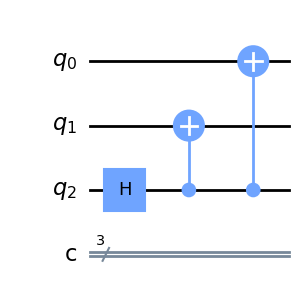

In [5]:
qc = QuantumCircuit(3,3)
qc.h(2)
qc.cnot(2,1)
qc.cnot(2,0)
qc.draw('mpl')

In [7]:
from qiskit.visualization import array_to_latex

In [8]:
n_sts = 2**3
for n in range(n_sts):
    sv = Statevector.from_int(n,n_sts)
    sv = sv.evolve(qc)
    display(sv.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [22]:
def encode(i,j,k):
    operations = {
        (0, 0, 0): [],
        (0, 0, 1): [('PauliX', 0), ('PauliX', 1)],
        (0, 1, 0): [('PauliX', 1)],
        (0, 1, 1): [('PauliX', 0)],
        (1, 0, 0): [('PauliZ', 0)],
        (1, 0, 1): [('PauliX', 0), ('PauliX', 1), ('PauliZ', 0)],
        (1, 1, 0): [('PauliZ', 0), ('PauliX', 1)],
        (1, 1, 1): [('PauliX', 0), ('PauliZ', 1)],
    }

    for op, qubit in operations[(i, j, k)]:
        if op == 'PauliX':
            qml.PauliX(qubit)
        elif op == 'PauliZ':
            qml.PauliZ(qubit)

In [10]:
def decode():
    qml.CNOT([0,2])
    qml.CNOT([0,1])
    qml.Hadamard(0)

In [12]:
dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def circuit(i, j, k):
    # Prepare GHZ state
    qml.Hadamard(0)
    qml.CNOT([0,1])
    qml.CNOT([0,2])

    qml.Barrier(wires=range(3))
    encode(i, j, k)

    qml.Barrier(wires=range(3))
    decode()

    return qml.probs(wires=range(3))

In [17]:
print(qml.draw(circuit)(0,0,0),'\n')
output = circuit(0,0,0)
print(output)
Statevector(output).draw('latex')

0: ──H─╭●─╭●─╭||─╭||─╭●─╭●──H─┤ ╭Probs
1: ────╰X─│──├||─├||─│──╰X────┤ ├Probs
2: ───────╰X─╰||─╰||─╰X───────┤ ╰Probs 

[1. 0. 0. 0. 0. 0. 0. 0.]


<IPython.core.display.Latex object>

In [16]:
print(qml.draw(circuit)(0,0,1),'\n')
output = circuit(0,0,1)
print(output)
Statevector(output).draw('latex')

0: ──H─╭●─╭●─╭||──X─╭||─╭●─╭●──H─┤ ╭Probs
1: ────╰X─│──├||──X─├||─│──╰X────┤ ├Probs
2: ───────╰X─╰||────╰||─╰X───────┤ ╰Probs 

[0. 1. 0. 0. 0. 0. 0. 0.]


<IPython.core.display.Latex object>

In [18]:
print(qml.draw(circuit)(0,1,1),'\n')
output = circuit(0,1,1)
print(output)
Statevector(output).draw('latex')

0: ──H─╭●─╭●─╭||──X─╭||─╭●─╭●──H─┤ ╭Probs
1: ────╰X─│──├||────├||─│──╰X────┤ ├Probs
2: ───────╰X─╰||────╰||─╰X───────┤ ╰Probs 

[0. 0. 0. 1. 0. 0. 0. 0.]


<IPython.core.display.Latex object>

In [19]:
print(qml.draw(circuit)(1,1,1),'\n')
output = circuit(1,1,1)
print(output)
Statevector(output).draw('latex')

0: ──H─╭●─╭●─╭||──X─╭||─╭●─╭●──H─┤ ╭Probs
1: ────╰X─│──├||──Z─├||─│──╰X────┤ ├Probs
2: ───────╰X─╰||────╰||─╰X───────┤ ╰Probs 

[0. 0. 0. 0. 0. 0. 0. 1.]


<IPython.core.display.Latex object>

**Challenge code**
You simply have to complete two quantum functions:

* encode: quantum function that will define an operator to be applied only on Zenda's qubits. This function will depend on the bits $(i,j,k)$ to be encoded.

* decode: quantum function that defines the operator that Reece will use to retrieve the bits that Zenda sent. In this case, the operator does not have any information about Zenda's bits, so the same operators will always be applied regardless of the state that Zenda sends Reece.

**Output**
In this challenge, we will not judge your solution using public or private test cases. Instead, we will check that, for all combinations of , , and , the entire encoding and decoding circuit behaves as expected.In this challenge, we will not judge your solution using public or private test cases. Instead, we will check that, for all combinations of $i$,$j$, and $k$, the entire encoding and decoding circuit behaves as expected.

In [21]:
import pennylane as qml
import pennylane.numpy as np

def encode(i, j, k):
    """
    Quantum encoding function. It must act only on the first two qubits.
    This function does not return anything, it simply applies gates.

    Args:
        i, j, k (int): The three encoding bits. They will take the values 1 or 0.

    """

    operations = {
        (0, 0, 0): [],
        (0, 0, 1): [('PauliX', 0), ('PauliX', 1)],
        (0, 1, 0): [('PauliX', 1)],
        (0, 1, 1): [('PauliX', 0)],
        (1, 0, 0): [('PauliZ', 0)],
        (1, 0, 1): [('PauliX', 0), ('PauliX', 1), ('PauliZ', 0)],
        (1, 1, 0): [('PauliZ', 0), ('PauliX', 1)],
        (1, 1, 1): [('PauliX', 0), ('PauliZ', 1)],
    }

    for op, qubit in operations[(i, j, k)]:
        if op == 'PauliX':
            qml.PauliX(qubit)
        elif op == 'PauliZ':
            qml.PauliZ(qubit)


def decode():
    """
    Quantum decoding function. It can act on the three qubits.
    This function does not return anything, it simply applies gates.
    """
    qml.CNOT([0,2])
    qml.CNOT([0,1])
    qml.Hadamard(0)


dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def circuit(i, j, k):
    """
    Circuit that generates the complete communication protocol.

    Args:
        i, j, k (int): The three encoding bits. They will take the value 1 or 0.
    """

    # We prepare the state 1/sqrt(2)(|000> + |111>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])

    # Zenda encodes the bits
    encode(i, j, k)

    # Reece decode the information
    decode()

    return qml.probs(wires=range(3))


# These functions are responsible for testing the solution.



def run(test_case_input: str) -> str:

    return None

def check(solution_output: str, expected_output: str) -> None:

    for i in range(2):
        for j in range(2):
            for k in range(2):
                assert np.isclose(circuit(i, j , k)[4 * i + 2 * j + k],1)

                dev = qml.device("default.qubit", wires=3)

                @qml.qnode(dev)
                def circuit2(i, j, k):
                    encode(i, j, k)
                    return qml.probs(wires=range(3))

                circuit2(i, j, k)
                ops = circuit2.tape.operations

                for op in ops:
                    assert not (2 in op.wires), "Invalid connection between qubits."


test_cases = [['No input', 'No output']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input 'No input'...
Correct!
